## 3.5 뉴스 기사 분류: 다중 분류 문제

### 코드 3-12 로이터 데이터셋 로드

In [19]:
from tensorflow.keras.datasets import reuters

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [10]:
len(train_data)

8982

In [11]:
len(test_data)

2246

In [15]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### 코드 3-13 로이터 데이터셋 텍스트로 디코딩 (이 과정 이해 안감)

In [50]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [51]:
train_labels[10]

3

## 3.5.2 데이터 준비

### 코드 3-14 데이터 인코딩

In [52]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [53]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [54]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 코드 3-15 모델 정의

In [59]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### 코드 3-16 모델 컴파일

In [60]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

## 3.5.4 훈련 검증

### 코드 3-17 검증 세트 준비

In [61]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 코드 3-18 모델 훈련

In [62]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 97us/sample - loss: 2.5678 - acc: 0.5360 - val_loss: 1.6734 - val_acc: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 74us/sample - loss: 1.3785 - acc: 0.7087 - val_loss: 1.2718 - val_acc: 0.7300
Epoch 3/20
7982/7982 [==============================] - 1s 73us/sample - loss: 1.0222 - acc: 0.7834 - val_loss: 1.1075 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.8036 - acc: 0.8330 - val_loss: 1.0195 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.6423 - acc: 0.8658 - val_loss: 0.9476 - val_acc: 0.8110
Epoch 6/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.5167 - acc: 0.8893 - val_loss: 0.9161 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.4212 - acc: 0.9103 - val_loss: 0.9013 - val_acc: 

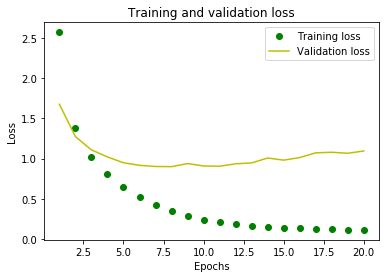

In [68]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 코드 3-20 훈련과 검증 정확도 그리기


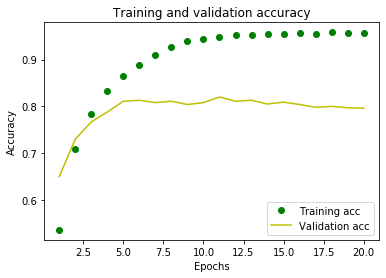

In [70]:
plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 코드 3-21 모델을 처음부터 다시 훈련

In [71]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size = 512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 88us/sample - loss: 2.4203 - acc: 0.5059 - val_loss: 1.6161 - val_acc: 0.6460
Epoch 2/9
7982/7982 [==============================] - 1s 73us/sample - loss: 1.3463 - acc: 0.7110 - val_loss: 1.2645 - val_acc: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s 73us/sample - loss: 1.0168 - acc: 0.7788 - val_loss: 1.1150 - val_acc: 0.7640
Epoch 4/9
7982/7982 [==============================] - 1s 74us/sample - loss: 0.8052 - acc: 0.8287 - val_loss: 1.0345 - val_acc: 0.7740
Epoch 5/9
7982/7982 [==============================] - 1s 74us/sample - loss: 0.6379 - acc: 0.8657 - val_loss: 0.9818 - val_acc: 0.7910
Epoch 6/9
7982/7982 [==============================] - 1s 73us/sample - loss: 0.5131 - acc: 0.8948 - val_loss: 0.9305 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 74us/sample - loss: 0.4085 - acc: 0.9154 - val_loss: 0.9274 - val_acc: 0.8150


In [72]:
results

[1.004263568327879, 0.7836153]

In [73]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array) / len(test_labels))

0.1856634016028495

## 3.5.5 새 데이터에 대해 예측

### 코드 3-22 새로운 데이터 대해 예측

In [74]:
predictions = model.predict(x_test)

In [77]:
predictions[0].shape

(46,)

In [83]:
np.sum(predictions[0])

1.0000004

In [86]:
np.argmax(predictions[0])

3

## 3.5.6 레이블과 손실을 다루는 다른 방법

In [87]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [88]:
model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

## 3.5.7 충분히 큰 중간층을 둬야 하는 이유

### 코드 3-23 정보 병목이 있는 모델

In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 113us/sample - loss: 3.0231 - acc: 0.2184 - val_loss: 2.3550 - val_acc: 0.4260
Epoch 2/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.9166 - acc: 0.5099 - val_loss: 1.6870 - val_acc: 0.6060
Epoch 3/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.4269 - acc: 0.6249 - val_loss: 1.4586 - val_acc: 0.6200
Epoch 4/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.2169 - acc: 0.6723 - val_loss: 1.3465 - val_acc: 0.6570
Epoch 5/20
7982/7982 [==============================] - 1s 96us/sample - loss: 1.0733 - acc: 0.7177 - val_loss: 1.3277 - val_acc: 0.6800
Epoch 6/20
7982/7982 [==============================] - 1s 97us/sample - loss: 0.9607 - acc: 0.7504 - val_loss: 1.2985 - val_acc: 0.6990
Epoch 7/20
7982/7982 [==============================] - 1s 96us/sample - loss: 0.8683 - acc: 0.7845 - val_loss: 1.3095 - val_acc: